1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [181]:
loan=pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [182]:
loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [183]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [184]:
loan.shape

(5000, 14)

In [185]:
print("Number of missing values in loan dataframe is:")
loan.isnull().sum()

Number of missing values in loan dataframe is:


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [186]:
loan.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


EDA: Study the data distribution in each attribute and target variable, share your findings

 Number of unique in each column?

In [187]:
loan.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

 Number of people with zero mortgage?

In [188]:
print("Number of people with zero mortgage=%d" %(len(loan[loan['Mortgage']==0].index)))

Number of people with zero mortgage=3462


 Number of people with zero credit card spending per month?

In [189]:
print("Number of people with zero credit card spending per month=%d" %(len(loan[loan['CCAvg']==0].index)))

Number of people with zero credit card spending per month=106


 Value counts of all categorical columns.

In [190]:
categorical_columns=['ID', 'ZIP Code', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for c in categorical_columns:
    print("Value counts for column " + c)
    print(loan[c].value_counts())

Value counts for column ID
2047    1
2608    1
4647    1
2600    1
553     1
       ..
3263    1
1218    1
3267    1
1222    1
2049    1
Name: ID, Length: 5000, dtype: int64
Value counts for column ZIP Code
94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP Code, Length: 467, dtype: int64
Value counts for column Education
1    2096
3    1501
2    1403
Name: Education, dtype: int64
Value counts for column Personal Loan
0    4520
1     480
Name: Personal Loan, dtype: int64
Value counts for column Securities Account
0    4478
1     522
Name: Securities Account, dtype: int64
Value counts for column CD Account
0    4698
1     302
Name: CD Account, dtype: int64
Value counts for column Online
1    2984
0    2016
Name: Online, dtype: int64
Value counts for column CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64


Univariate and Bivariate

In [191]:
# ID and ZIP code are meaningless for the purposes of this project, so remove them.
loan.drop(columns=['ID', 'ZIP Code'], inplace=True)


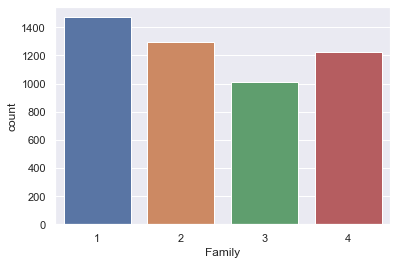

In [192]:
#Let's check the distribution of family sizes
sns.countplot(loan['Family'])

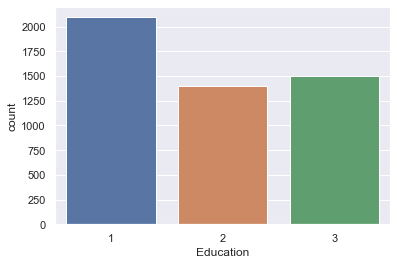

In [193]:
sns.countplot(loan['Education'])

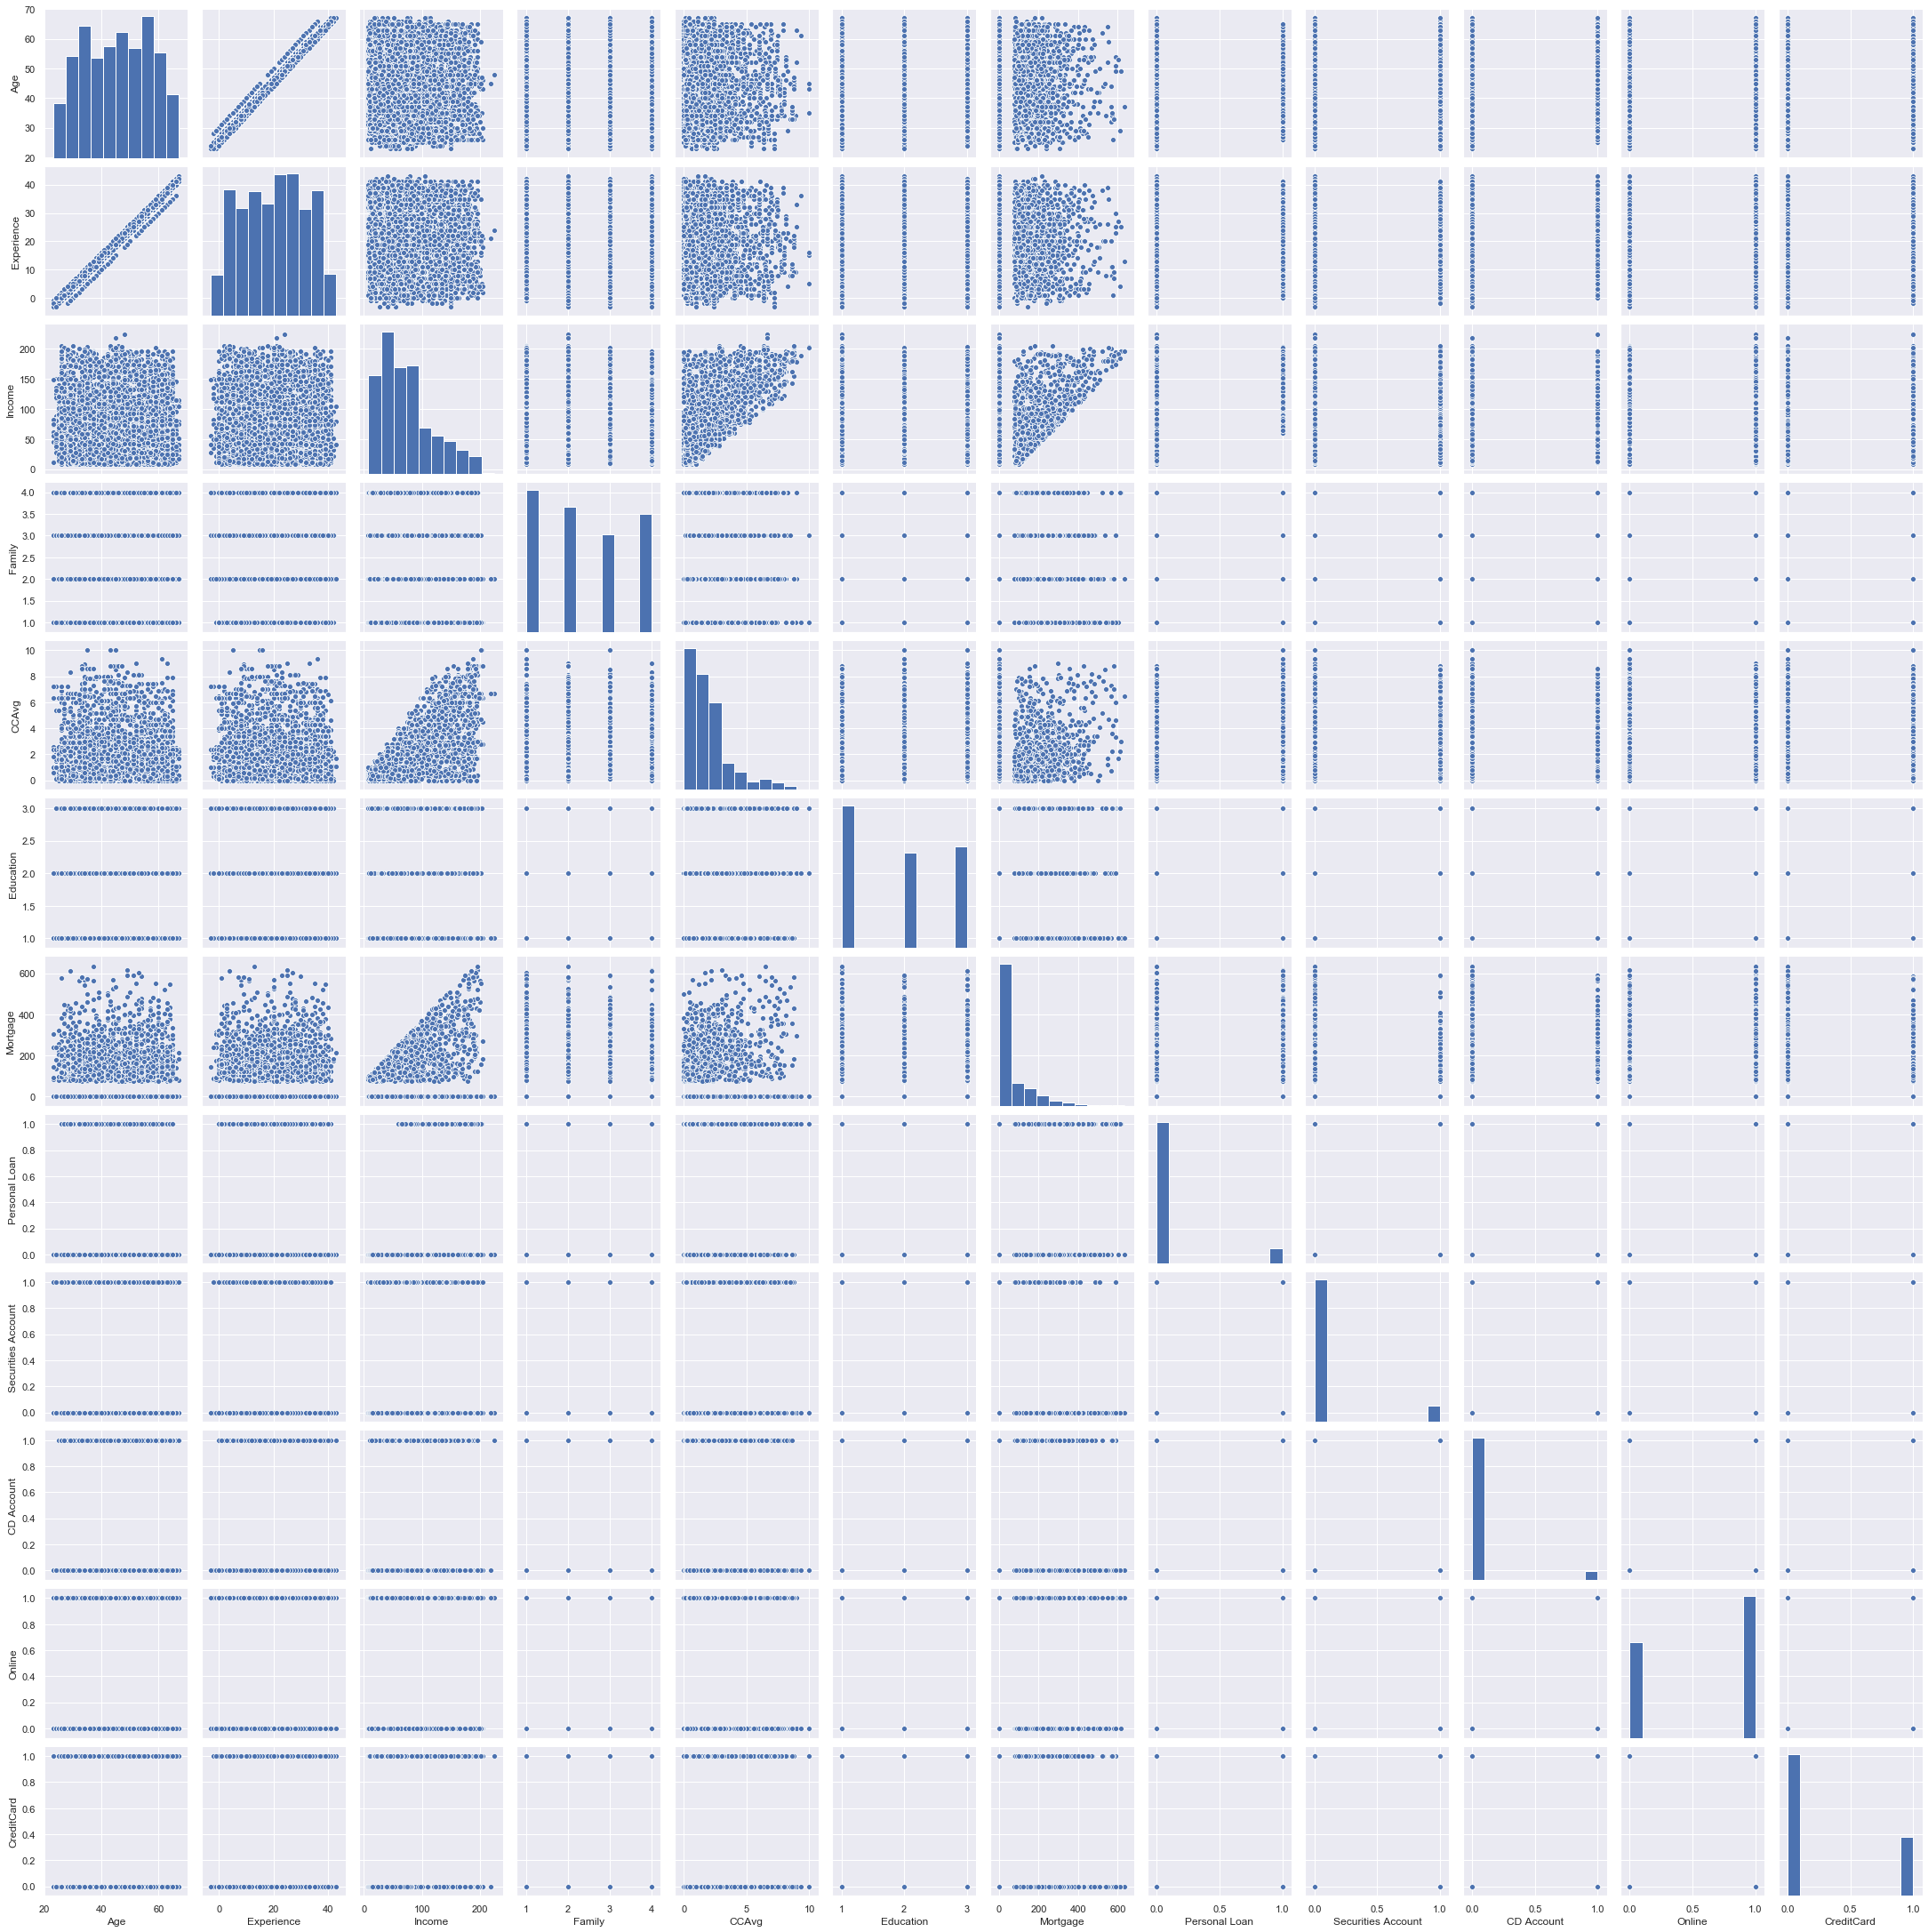

In [194]:
sns.pairplot(loan)

In [195]:
loan.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


In [196]:
# Education is actually a categorical column with 3 possible options. So convert it to type categorical
loan['Education']=loan['Education'].astype('category')

In [197]:
# Other categorical columns can remain as integers as they take only values 0 and 1.
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   int64   
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal Loan       5000 non-null   int64   
 8   Securities Account  5000 non-null   int64   
 9   CD Account          5000 non-null   int64   
 10  Online              5000 non-null   int64   
 11  CreditCard          5000 non-null   int64   
dtypes: category(1), float64(1), int64(10)
memory usage: 434.8 KB


In [198]:
# One hot encode the categorical column and remove the observation column
X=pd.get_dummies(loan.drop(columns=['Personal Loan']), drop_first=True)

In [199]:
Y=loan['Personal Loan']

In [200]:
X.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_2,Education_3
0,25,1,49,4,1.6,0,1,0,0,0,0,0
1,45,19,34,3,1.5,0,1,0,0,0,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,0
3,35,9,100,1,2.7,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,1,1,0


In [201]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 42 )

In [202]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(max_iter=2000)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [203]:
y_predict = lr.predict(X_test)

In [204]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

In [205]:
def perf(logreg, X_train, y_train, X_test, y_test, y_predict):
    print("Trainig accuracy",logreg.score(X_train,y_train))  
    print()
    print("Testing accuracy",logreg.score(X_test, y_test))
    print()
    print('Confusion Matrix')
    print(draw_cm(y_test,y_predict))
    print()
    print("Recall:",recall_score(y_test,y_predict))
    print()
    print("Precision:",precision_score(y_test,y_predict))
    print()
    print("F1 Score:",f1_score(y_test,y_predict))
    print()
    print("Roc Auc Score:",roc_auc_score(y_test,y_predict))



Trainig accuracy 0.9571428571428572

Testing accuracy 0.958

Confusion Matrix


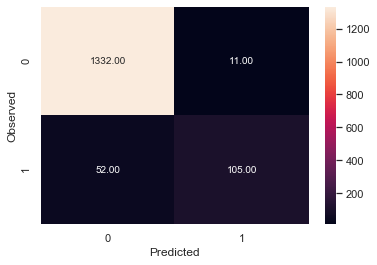

None

Recall: 0.6687898089171974

Precision: 0.9051724137931034

F1 Score: 0.7692307692307693

Roc Auc Score: 0.8302995954489191


In [206]:
perf(logreg, X_train, y_train, X_test, y_test, y_predict)

**Give your reasoning on how can the model perform better?**

In [207]:
# Since recall is low, we can improve it by increase the C parameter. Try different solvers with C=1000
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
precision=[]
recall=[]
f1=[]
roc=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
#solver = ['liblinear','saga']

for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 1000, solver=i, max_iter=4000)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    recall.append(recall_score(y_test, y_predict))
    precision.append(precision_score(y_test, y_predict))
    f1.append(f1_score(y_test,y_predict))
    roc.append(roc_auc_score(y_test,y_predict))
    
print(solver)
print("Training score")
print(train_score)
print("Testing score")
print(test_score)
print("Recall score")
print(recall)
print("Precision score")
print(precision)
print("f1 score")
print(f1)
print("roc auc")
print(roc)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
Training score
[0.959, 0.959, 0.959, 0.945, 0.938]
Testing score
[0.961, 0.961, 0.961, 0.939, 0.929]
Recall score
[0.7006369426751592, 0.7006369426751592, 0.7006369426751592, 0.535031847133758, 0.47770700636942676]
Precision score
[0.9016393442622951, 0.9016393442622951, 0.9016393442622951, 0.8235294117647058, 0.7575757575757576]
f1 score
[0.7885304659498208, 0.7885304659498208, 0.7885304659498208, 0.6486486486486486, 0.5859375000000001]
roc auc
[0.8458508615088379, 0.8458508615088379, 0.8458508615088379, 0.7608145088237664, 0.7299182835272303]


Trainig accuracy 0.9585714285714285

Testing accuracy 0.9606666666666667

Confusion Matrix


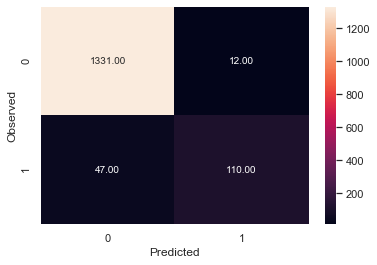

None

Recall: 0.7006369426751592

Precision: 0.9016393442622951

F1 Score: 0.7885304659498208

Roc Auc Score: 0.8458508615088379


In [208]:
# So we will accept the default solver lbfgs with C=1000 to improve recall maintaining same precision
logreg2=LogisticRegression(C=1000, max_iter=2000)
logreg2.fit(X_train, y_train)
y_predict=logreg2.predict(X_test)
perf(logreg2, X_train, y_train, X_test, y_test, y_predict)

**Give Business understanding of your model?**

With logreg2 model, about 90% of the targeted customer base is a success. We are able to capture 70% of the true positives.
This is a very good model if it is expensive to target more customers.

However, we can improve the recall score (that is, capture more positive customers) if we are willing to sacrifice some precision. If the cost of targetting more customers is not high, the below model that uses class_weight="balanced" is a good option as it captures almost 92% of the positive customers even though the success ratio (precision score) is only about 50% - still a significant improvement over the 9% success rate in the complete data.

Trainig accuracy 0.8985714285714286

Testing accuracy 0.8966666666666666

Confusion Matrix


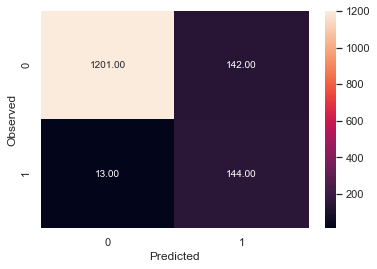

None

Recall: 0.9171974522292994

Precision: 0.5034965034965035

F1 Score: 0.6501128668171559

Roc Auc Score: 0.9057320098078738


In [209]:
logreg3=LogisticRegression(C=1000, class_weight="balanced", max_iter=2000)
logreg3.fit(X_train, y_train)
y_predict=logreg3.predict(X_test)
perf(logreg3, X_train, y_train, X_test, y_test, y_predict)